# Mine(EDAKING)

In [721]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [722]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(891, 12) (418, 11)


In [723]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [724]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [725]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [726]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [727]:
concat_all = pd.concat([train,test],ignore_index=True)

In [728]:
concat_all.shape

(1309, 12)

In [729]:
concat_all.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [730]:
concat_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [731]:
concat_all.groupby('Pclass')[['Survived']].mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [732]:
concat_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [733]:
concat_all['Title'] = concat_all['Name'].str.extract('([A-Za-z]+)\.')

In [734]:
concat_all['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Lady          1
Mme           1
Dona          1
Don           1
Jonkheer      1
Countess      1
Sir           1
Capt          1
Name: Title, dtype: int64

In [735]:
concat_all['Title'].replace(['Dr','Rev','Col','Major','Don','Capt','Countess','Jonkheer','Lady','Sir','Dona'],'Rare',inplace=True)
concat_all['Title'].replace('Mlle','Miss',inplace=True)
concat_all['Title'].replace('Ms','Miss',inplace=True)
concat_all['Title'].replace('Mme','Mrs',inplace=True)

In [736]:
concat_all['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [737]:
concat_all.groupby('Title')[['Survived']].mean().sort_values(by='Survived',ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [738]:
concat_all.drop('Name',axis=1,inplace=True)

In [739]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [740]:
concat_all.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [741]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [742]:
concat_all.groupby('SibSp')[['Survived']].mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [743]:
concat_all.groupby('Parch')[['Survived']].mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000
9,NaN


In [744]:
concat_all['FamilySize'] = concat_all['SibSp'] + concat_all['Parch']

In [745]:
concat_all.groupby('FamilySize')[['Survived']].mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [746]:
concat_all['Alone'] = 0
concat_all.loc[ concat_all['FamilySize'] == 0,'Alone'] = 1

In [747]:
concat_all.groupby('Alone')[['Survived']].mean()

,Survived
Alone,
0,0.505650
1,0.303538


In [748]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Alone
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1


In [749]:
concat_all.drop(['SibSp','Parch','FamilySize'],axis=1,inplace=True)

In [750]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,male,22.0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1.0,1,female,38.0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1.0,1,female,35.0,113803,53.1000,C123,S,Mrs,0
4,5,0.0,3,male,35.0,373450,8.0500,NaN,S,Mr,1


In [751]:
concat_all['Ticket'].value_counts()

CA. 2343        11
1601             8
CA 2144          8
S.O.C. 14879     7
PC 17608         7
                ..
PC 17613         1
2655             1
349239           1
2620             1
2667             1
Name: Ticket, Length: 929, dtype: int64

In [752]:
concat_all.drop('Ticket',axis=1,inplace=True)

In [753]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,male,22.0,7.2500,NaN,S,Mr,0
1,2,1.0,1,female,38.0,71.2833,C85,C,Mrs,0
2,3,1.0,3,female,26.0,7.9250,NaN,S,Miss,1
3,4,1.0,1,female,35.0,53.1000,C123,S,Mrs,0
4,5,0.0,3,male,35.0,8.0500,NaN,S,Mr,1


In [754]:
concat_all['Fare'].isnull().sum()

1

In [755]:
concat_all[ concat_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
1043,1044,NaN,3,male,60.5,NaN,NaN,S,Mr,1


In [756]:
concat_all[ (concat_all['Pclass']==3) & (concat_all['Embarked']=='S') & (concat_all['Alone']==1) ]['Fare'].mean()

9.593713003095983

In [757]:
concat_all['Fare'].mean()

33.2954792813456

In [758]:
concat_all.loc[concat_all['Fare'].isnull(),'Fare'] = concat_all[ (concat_all['Pclass']==3) & (concat_all['Embarked']=='S') & (concat_all['Alone']==1) ]['Fare'].mean()

In [759]:
concat_all['Fare'].isnull().sum()

0

In [760]:
concat_all.loc[ concat_all['Cabin'].notnull(),'Cabin'] = [ cabin[0] for cabin in concat_all['Cabin'].dropna()]

In [761]:
concat_all['Cabin'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [762]:
concat_all.groupby('Cabin')[['Fare']].mean().sort_values(by='Fare')

,Fare
Cabin,
G,14.205000
F,18.079367
T,35.500000
A,41.244314
D,53.007339
E,54.564634
C,107.926598
B,122.383078


In [763]:
concat_all['Cabin'].isnull().sum()

1014

In [764]:
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] <=14.2 ), 'Cabin'] = 'G'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >14.2 ) & (concat_all['Fare'] <=18), 'Cabin'] = 'F'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >18 & (concat_all['Fare'] <=35.5) ), 'Cabin'] = 'T'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >35.5 ) & (concat_all['Fare'] <=41.2), 'Cabin'] = 'A'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >41.2 ) & (concat_all['Fare'] <=53), 'Cabin'] = 'D'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >53 ) & (concat_all['Fare'] <=54.5), 'Cabin'] = 'E'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >54.5 ) & (concat_all['Fare'] <=107.9), 'Cabin'] = 'C'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >107.9 ), 'Cabin'] = 'B'

In [765]:
concat_all['Cabin'].isnull().sum()

0

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

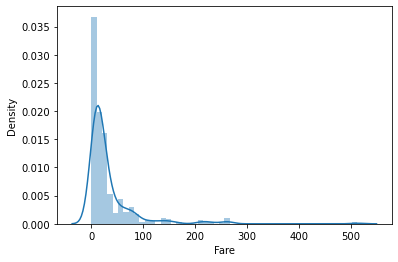

In [766]:
sns.distplot(concat_all['Fare'])

In [767]:
concat_all['FareBand'] = pd.qcut(concat_all['Fare'],4)

In [768]:
concat_all.groupby('FareBand')[['Survived']].mean()

,Survived
FareBand,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.600000


In [769]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,FareBand
0,1,0.0,3,male,22.0,7.2500,G,S,Mr,0,"(-0.001, 7.896]"
1,2,1.0,1,female,38.0,71.2833,C,C,Mrs,0,"(31.275, 512.329]"
2,3,1.0,3,female,26.0,7.9250,G,S,Miss,1,"(7.896, 14.454]"
3,4,1.0,1,female,35.0,53.1000,C,S,Mrs,0,"(31.275, 512.329]"
4,5,0.0,3,male,35.0,8.0500,G,S,Mr,1,"(7.896, 14.454]"


In [770]:
concat_all.drop('FareBand',axis=1,inplace=True)

In [771]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,male,22.0,7.2500,G,S,Mr,0
1,2,1.0,1,female,38.0,71.2833,C,C,Mrs,0
2,3,1.0,3,female,26.0,7.9250,G,S,Miss,1
3,4,1.0,1,female,35.0,53.1000,C,S,Mrs,0
4,5,0.0,3,male,35.0,8.0500,G,S,Mr,1


In [772]:
concat_all['Cabin'].value_counts()

G    618
T    311
F    112
C     94
B     65
D     46
E     41
A     22
Name: Cabin, dtype: int64

In [773]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,male,22.0,7.2500,G,S,Mr,0
1,2,1.0,1,female,38.0,71.2833,C,C,Mrs,0
2,3,1.0,3,female,26.0,7.9250,G,S,Miss,1
3,4,1.0,1,female,35.0,53.1000,C,S,Mrs,0
4,5,0.0,3,male,35.0,8.0500,G,S,Mr,1


In [774]:
concat_all['Embarked'].isnull().sum()

2

In [775]:
concat_all[ concat_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
61,62,1.0,1,female,38.0,80.0,B,NaN,Miss,1
829,830,1.0,1,female,62.0,80.0,B,NaN,Mrs,1


In [776]:
concat_all[(concat_all['Pclass']==1) & (concat_all['Sex']=='female')  & (concat_all['Cabin']=='B') & (concat_all['Alone']==1)]['Embarked'].value_counts()

S    6
C    5
Name: Embarked, dtype: int64

In [777]:
concat_all['Embarked'].fillna('C',inplace=True)

In [778]:
concat_all['Embarked'].isnull().sum()

0

In [779]:
concat_all['Embarked'].value_counts()

S    914
C    272
Q    123
Name: Embarked, dtype: int64

In [780]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,male,22.0,7.2500,G,S,Mr,0
1,2,1.0,1,female,38.0,71.2833,C,C,Mrs,0
2,3,1.0,3,female,26.0,7.9250,G,S,Miss,1
3,4,1.0,1,female,35.0,53.1000,C,S,Mrs,0
4,5,0.0,3,male,35.0,8.0500,G,S,Mr,1


In [781]:
concat_all.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
Fare             0
Cabin            0
Embarked         0
Title            0
Alone            0
dtype: int64

In [782]:
abs(concat_all.corr()[['Age']]).sort_values(by='Age',ascending=False)

,Age
Age,1.000000
Pclass,0.408106
Fare,0.177344
Alone,0.128755
Survived,0.077221
PassengerId,0.028814


In [783]:
concat_all['Age'].mean()

29.881137667304014

In [784]:
age_null_idx_list = list(concat_all[concat_all['Age'].isnull()].index)

In [785]:
len(age_null_idx_list)

263

In [786]:
concat_all[ concat_all['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
5,6,0.0,3,male,NaN,8.4583,G,Q,Mr,1
17,18,1.0,2,male,NaN,13.0000,G,S,Mr,1
19,20,1.0,3,female,NaN,7.2250,G,C,Mrs,1
26,27,0.0,3,male,NaN,7.2250,G,C,Mr,1
28,29,1.0,3,female,NaN,7.8792,G,Q,Miss,1
...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,female,NaN,7.7208,G,Q,Miss,1
1301,1302,NaN,3,female,NaN,7.7500,G,Q,Miss,1
1304,1305,NaN,3,male,NaN,8.0500,G,S,Mr,1
1307,1308,NaN,3,male,NaN,8.0500,G,S,Mr,1


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

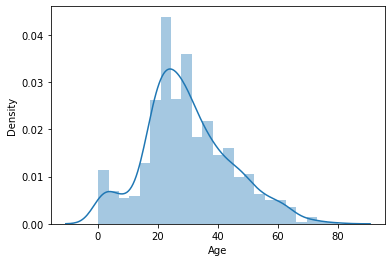

In [787]:
sns.distplot(concat_all['Age'])

In [788]:
for idx in age_null_idx_list:
    pred_age = concat_all[(concat_all['Pclass'] == concat_all.iloc[idx,concat_all.columns.get_loc('Pclass')]) & 
                          (concat_all['Cabin'] == concat_all.iloc[idx,concat_all.columns.get_loc('Cabin')]) & 
                          (concat_all['Fare'] == concat_all.iloc[idx,concat_all.columns.get_loc('Fare')]) & 
                          (concat_all['Alone'] == concat_all.iloc[idx,concat_all.columns.get_loc('Alone')])]['Age'].mean()
    
    if not np.isnan(pred_age):
        concat_all.iloc[idx,concat_all.columns.get_loc('Age')] = pred_age
    else:
        concat_all.iloc[idx,concat_all.columns.get_loc('Age')] = concat_all['Age'].mean()

In [789]:
concat_all['Age'].isnull().sum()

0

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

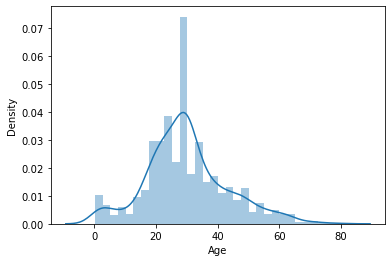

In [790]:
sns.distplot(concat_all['Age'])

In [791]:
concat_all['AgeBand'] = pd.cut(concat_all['Age'],5)

In [792]:
concat_all.groupby('AgeBand')[['Survived']].mean()

,Survived
AgeBand,
"(0.0902, 16.136]",0.518182
"(16.136, 32.102]",0.333333
"(32.102, 48.068]",0.413333
"(48.068, 64.034]",0.459459
"(64.034, 80.0]",0.090909


In [793]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,AgeBand
0,1,0.0,3,male,22.0,7.2500,G,S,Mr,0,"(16.136, 32.102]"
1,2,1.0,1,female,38.0,71.2833,C,C,Mrs,0,"(32.102, 48.068]"
2,3,1.0,3,female,26.0,7.9250,G,S,Miss,1,"(16.136, 32.102]"
3,4,1.0,1,female,35.0,53.1000,C,S,Mrs,0,"(32.102, 48.068]"
4,5,0.0,3,male,35.0,8.0500,G,S,Mr,1,"(32.102, 48.068]"


In [794]:
concat_all.drop('AgeBand',axis=1,inplace=True)

In [795]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,male,22.0,7.2500,G,S,Mr,0
1,2,1.0,1,female,38.0,71.2833,C,C,Mrs,0
2,3,1.0,3,female,26.0,7.9250,G,S,Miss,1
3,4,1.0,1,female,35.0,53.1000,C,S,Mrs,0
4,5,0.0,3,male,35.0,8.0500,G,S,Mr,1


In [796]:
concat_all.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
Cabin            0
Embarked         0
Title            0
Alone            0
dtype: int64

- Mapping

In [797]:
concat_all['Title'] = concat_all['Title'].map({'Mrs':1,'Miss':2,'Master':3,'Rare':4,'Mr':5})
concat_all['Sex'] = concat_all['Sex'].map({'female':1,'male':2})
concat_all.loc[ (concat_all['Fare'] <= 7.896) ,'Fare'] = 1
concat_all.loc[ (concat_all['Fare'] > 7.896) & (concat_all['Fare'] <= 14.454) ,'Fare'] = 2
concat_all.loc[ (concat_all['Fare'] > 14.454) & (concat_all['Fare'] <= 31.275) ,'Fare'] = 3
concat_all.loc[ (concat_all['Fare'] > 31.275) ,'Fare'] = 4
concat_all['Fare'] = concat_all['Fare'].astype(int)
concat_all['Cabin'] = concat_all['Cabin'].map({'G':1,'T':2,'F':3,'C':4,'B':5,'D':6,'E':7,'A':8})
concat_all['Embarked'] = concat_all['Embarked'].map({'S':1,'C':2,'Q':3})
concat_all.loc[ (concat_all['Age'] <= 16),'Age'] = 1
concat_all.loc[ (concat_all['Age'] > 16) & (concat_all['Age']<=32),'Age'] = 2
concat_all.loc[ (concat_all['Age'] > 32) & (concat_all['Age']<=48),'Age'] = 3
concat_all.loc[ (concat_all['Age'] > 48) & (concat_all['Age']<=64),'Age'] = 4
concat_all.loc[ (concat_all['Age'] > 64),'Age'] = 5
concat_all['Age'] = concat_all['Age'].astype(int)

In [798]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,2,2,1,1,1,5,0
1,2,1.0,1,1,3,4,4,2,1,0
2,3,1.0,3,1,2,2,1,1,2,1
3,4,1.0,1,1,3,4,4,1,1,0
4,5,0.0,3,2,3,2,1,1,5,1


In [799]:
new_train = concat_all.loc[:train.shape[0]-1,'Survived':]

In [800]:
new_train.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
886,0.0,2,2,2,2,1,1,4,1
887,1.0,1,1,2,3,5,1,2,1
888,0.0,3,1,2,3,2,1,2,0
889,1.0,1,2,2,3,4,2,5,1
890,0.0,3,2,2,1,1,3,5,1


In [801]:
new_train['Survived'] = new_train['Survived'].astype(int)

In [802]:
new_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,0,3,2,2,1,1,1,5,0
1,1,1,1,3,4,4,2,1,0
2,1,3,1,2,2,1,1,2,1
3,1,1,1,3,4,4,1,1,0
4,0,3,2,3,2,1,1,5,1


In [803]:
new_test = concat_all.loc[train.shape[0]:,'Pclass':]

In [804]:
new_test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
891,3,2,3,1,1,3,5,1
892,3,1,3,1,1,1,1,0
893,2,2,4,2,1,3,5,1
894,3,2,2,2,1,1,5,1
895,3,1,2,2,1,1,1,0


In [805]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

models = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

result = pd.DataFrame(columns=['Model','Accuracy'])

sss = StratifiedShuffleSplit(n_splits=10,random_state=0,test_size=0.1)

x = new_train.iloc[:,1:]
y = new_train.iloc[:,0]

score_dict = {}

for train_idx, test_idx in sss.split(x,y):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        if name in score_dict:
            score_dict[name] += acc
        else:
            score_dict[name] = acc
            

In [806]:
for model_name in score_dict:
    score_dict[model_name] = score_dict[model_name] / 10 
    cur_df = pd.DataFrame([[model_name,score_dict[model_name]]],columns=result.columns)
    result = result.append(cur_df)

<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

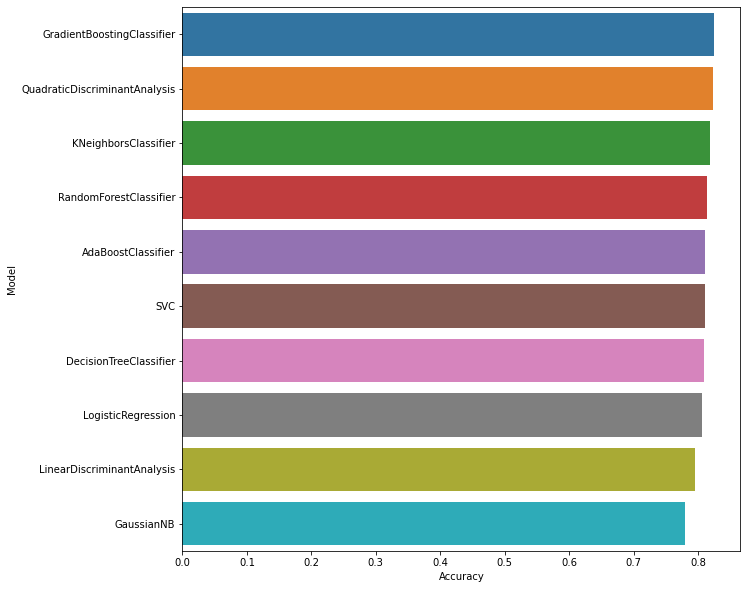

In [807]:
plt.figure(figsize=(10,10))
result = result.sort_values(by='Accuracy',ascending=False)
sns.barplot(data=result,y='Model',x='Accuracy')

In [812]:
best_model =     SVC()
best_model.fit(new_train.iloc[:,1:],new_train.iloc[:,0])
y_pred = best_model.predict(new_test)

my_submission = pd.DataFrame( { 'PassengerId' : test['PassengerId'],
                              'Survived':y_pred})

In [813]:
my_submission.to_csv('my_submission.csv',index=False)

In [814]:
my_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [811]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
